<img alt="Colaboratory logo" width="30%" src="https://github.com/roniltonattim/doctor_data_science/blob/main/banner_ronilton_attim.png?raw=true">

#### **Doctor Data Science**

---

# Análise dos Dados do Airbnb - *Veneza - Itália*

O [Airbnb](https://www.airbnb.com.br/) é considerado a **maior empresa hoteleira da atualidade** sem nem mesmo **possuir hotel**!

A plataforma conecta pessoas que desejam viajar e se hospedarem em algum lugar com os anfitriões que querem alugar seus imóveis de forma rápida e mais prática.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Veneza na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/veneto/venice/2022-09-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número que identifica o imóvel
* name - nome do imóvel
* host_id - número que identifica dono imóvel
* neighbourhood_group - variável sem relevância para nosso estudo de caso
* neighbourhood - bairro onde está o imóvel
* latitude - latidude do imóvel
* longitude - longitude do imóvel
* room_type - tipo de imóvel
* price - preço do aluguel do imóve/diária
* minimum_nighths - mínimo de noites para alugar
* number_of_reviews - número de avaliações
* last_review - data da última avaliação
* reviews_per_month - avaliações por mês
* calculated_host_listings_count - quantidade de imóveis por anfitrião
* availability_365 - quantidade de dias por ano que o imóvel está disponível

Antes de iniciar qualquer análise, vamos verificar o *dataset* analisando as 5 primeiras entradas.

In [3]:
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,250,5,175,2022-08-16,1.12,3,266,12,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,290,4,75,2022-08-06,0.56,3,316,11,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,180,4,195,2022-07-11,1.29,3,240,11,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,250,1,416,2022-06-09,2.83,2,70,5,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,320,3,96,2022-09-03,0.69,1,223,18,M0270422294


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [168]:
print("Quantidade de variáveis do dataset é de : {}".format(df.shape[1]))
print("Quantidade de entradas do dataset é de : {}".format(df.shape[0]))
print(
    "---------------------------------------------"
      )
print("Tipos de variáveis do dataset:")    
print(df.dtypes)


Quantidade de variáveis do dataset é de : 18
Quantidade de entradas do dataset é de : 7988
---------------------------------------------
Tipos de variáveis do dataset:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
display((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

license                           0.79006
reviews_per_month                 0.09990
last_review                       0.09990
name                              0.00000
number_of_reviews_ltm             0.00000
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
id                                0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
neighbourhood_group               0.00000
host_name                         0.00000
host_id                           0.00000
price                             0.00000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

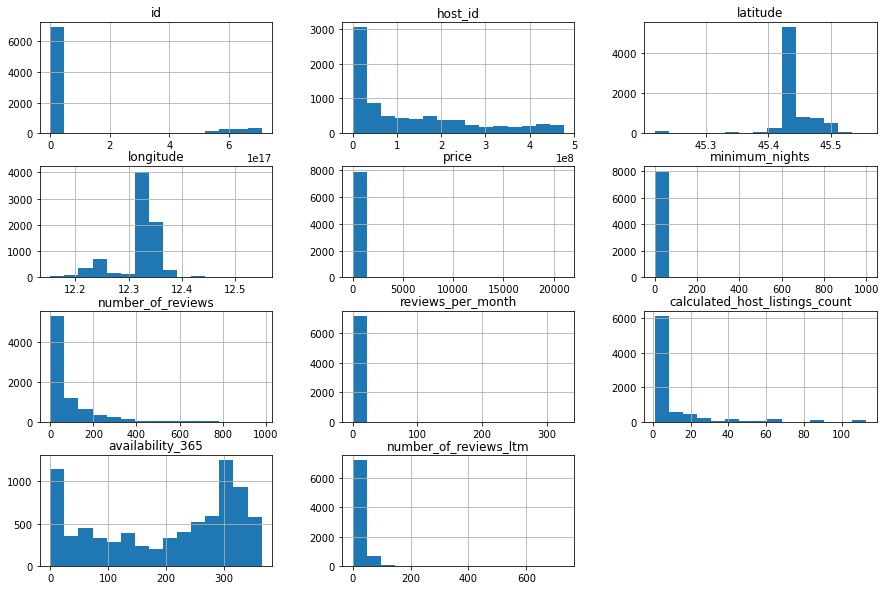

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [7]:
# ver a média da coluna `price`
media_precos = df["price"].mean()
print("A média de preços da diária na cidade de Veneza na Itália é de: {}".format(media_precos))

A média de preços da diária na cidade de Veneza na Itália é de: 268.7804206309464


### **Q5. Há valores outliers presentes?**

In [48]:
display(df[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count',
 'availability_365']].describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7988.000000,7988.000000,7988.000000,7190.000000,7988.000000,7988.000000
mean,268.780421,2.666375,70.130446,1.850384,9.948172,197.939159
std,1080.746953,13.732286,99.494762,4.781660,19.122828,122.551494
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,100.000000,1.000000,6.000000,0.490000,1.000000,76.000000
50%,146.000000,2.000000,30.000000,1.240000,3.000000,237.000000
75%,229.000000,3.000000,95.000000,2.517500,8.000000,308.000000
max,21000.000000,999.000000,981.000000,326.420000,113.000000,365.000000


Como podemos ver no Dataframe acima, há valores outliers que podem interferir na nossa análise de dados. A média de preços é de 268,78 e o maior valor é de 21000. Em mínimo de noites há um máximo de 999 que está muito fora do padrão em que podemos ver que 75% dos dados está em 3 noites. Estes dados devem ser tratados. Iremos retira-los e plotar novos histogramas.

Vamos analisar a quantidade de dados em mínimo de noites que estão acima de 30 dias.

In [68]:
min_noite = (df["minimum_nights"]>30).sum()
total_min_noite = df["minimum_nights"].shape[0]
porcentagem = (min_noite/total_min_noite)*100
print("A quantidade de dados em mínimo de noites maior que 30 dias é de: {} ,o que representa: {} %.".format(min_noite, porcentagem))

A quantidade de dados em mínimo de noites maior que 30 dias é de: 15 ,o que representa: 0.18778167250876315 %.


Vamos analisar agora a quantidade de dados em "preço" que está acima de 2000 (valor a princípio compatível com a maioria dos imóveis no Dataframe) para podemos retirar os outliers.

In [111]:
preco_maiores = (df["price"]>2000).sum()
total_preco = df["price"].shape[0]
porcentagem_preco = (preco_maiores/total_preco)*100
print("A quantidade de dados em price maior que 2000 é de: {} ,o que representa: {} %.".format(preco_maiores, porcentagem_preco))

A quantidade de dados em price maior que 2000 é de: 58 ,o que representa: 0.7260891337005508 %.


Agora iremos fazer um novo dataframe retirando esses valores outliers e dados com valores ausentes.

In [112]:
#retirando as colunas "license e neighbourhood_group"
df_clean = df.copy()
df_clean.drop("license", axis=1, inplace=True)
df_clean.drop("neighbourhood_group", axis=1, inplace=True)
display(df_clean)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6623,Venice Blue on Canal apartment,15016,Francesca,San Polo,45.438170,12.327390,Entire home/apt,250,5,175,2022-08-16,1.12,3,266,12
1,6624,Venice garden charme and canal view!,15016,Francesca,Santa Croce,45.439770,12.327360,Entire home/apt,290,4,75,2022-08-06,0.56,3,316,11
2,12074,Venice home to relax and emotions,15016,Francesca,San Polo,45.438960,12.329700,Entire home/apt,180,4,195,2022-07-11,1.29,3,240,11
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,San Marco,45.432770,12.334560,Private room,250,1,416,2022-06-09,2.83,2,70,5
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Cannaregio,45.445690,12.329020,Entire home/apt,320,3,96,2022-09-03,0.69,1,223,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,11005691,Bright studio to Redentore,57108832,Gianluca,Giudecca,45.425660,12.332510,Entire home/apt,132,2,257,2022-07-21,3.25,1,0,12
7984,5157327,Mimi'studio,26671279,Pietro,Dorsoduro,45.428650,12.335000,Entire home/apt,120,3,35,2020-06-21,0.41,3,0,0
7985,8513959,Piccola Perla nella Piccola Venezia,24668521,Alessandra,Pellestrina,45.218840,12.279930,Entire home/apt,54,5,42,2020-08-23,0.52,1,249,0
7986,574367081424254234,Appartamento Stella Marina,447685364,Valentina,Pellestrina,45.218636,12.291048,Entire home/apt,58,1,8,2022-07-10,1.68,1,347,8


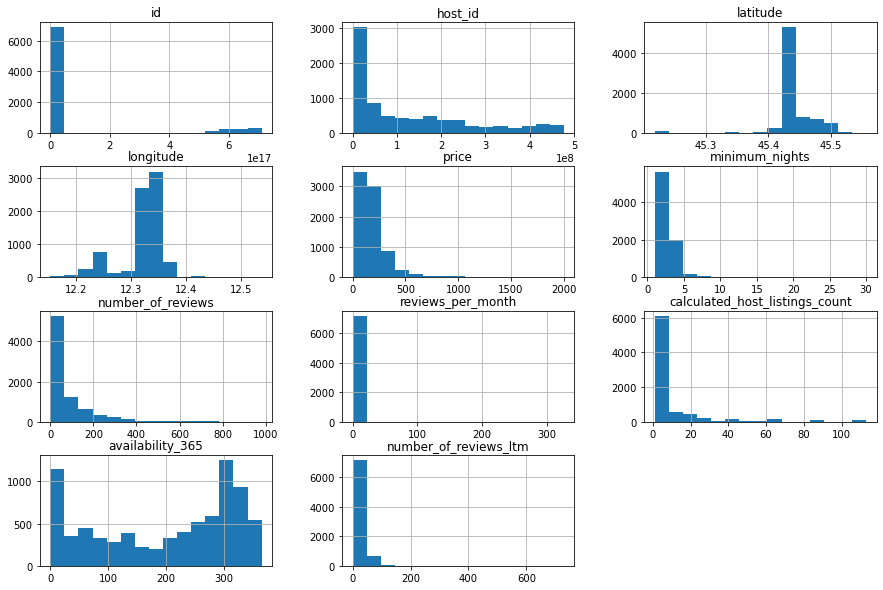

In [113]:
#retirando os outliers
df_clean.drop(df_clean[df_clean["price"]>2000].index,axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["minimum_nights"]>30].index,axis=0, inplace=True)
#plotando novo histograma sem outliers
df_clean.hist(bins=15, figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis**

In [119]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count',
 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.024425,-0.166820,-0.051968,0.308579,0.110251
minimum_nights,-0.024425,1.000000,-0.038650,-0.053022,-0.075750,-0.079667
number_of_reviews,-0.166820,-0.038650,1.000000,0.295779,-0.153471,-0.016778
reviews_per_month,-0.051968,-0.053022,0.295779,1.000000,-0.051132,-0.006254
calculated_host_listings_count,0.308579,-0.075750,-0.153471,-0.051132,1.000000,0.162536
availability_365,0.110251,-0.079667,-0.016778,-0.006254,0.162536,1.000000


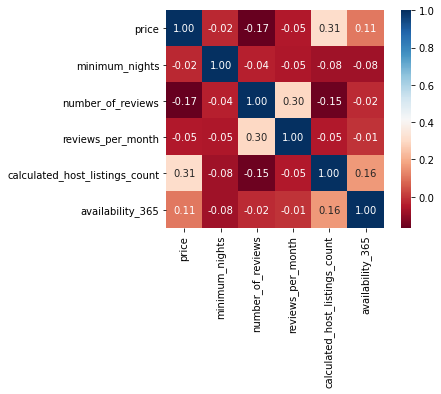

In [129]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt= ".2f",square=True, linecolor="white", annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [137]:
# mostrar a quantidade de cada tipo de imóvel disponível
tipo_imovel = df_clean["room_type"].value_counts()
display(tipo_imovel)

Entire home/apt    6120
Private room       1575
Hotel room          194
Shared room          26
Name: room_type, dtype: int64

In [139]:
# mostrar a porcentagem de cada tipo de imóvel disponível
quant_imovel = df_clean.shape[0]
display(tipo_imovel/quant_imovel)

Entire home/apt    0.773215
Private room       0.198989
Hotel room         0.024510
Shared room        0.003285
Name: room_type, dtype: float64

Como podemos ver acima 77% dos imóveis são do tipo casa/apartamento completo.

### **Q8. Qual a localidade mais cara do dataset?**



In [164]:
# ver preços por bairros, na média
display(df_clean.groupby(["neighbourhood"])["price"].mean().sort_values(ascending=False)[:10])

neighbourhood
Capitello      875.000000
Ferrarese      450.000000
Favaro         351.627907
Vignole        330.000000
San Marco      282.198522
Torcello       250.000000
Lido           228.884498
San Polo       227.037997
Dorsoduro      224.571930
Santa Croce    204.534759
Name: price, dtype: float64

Fazendo uma pesquisa no site do Google "bairros mais caros de Veneza na Itáli", vemos que a maioria dos sites informa o bairro de San Marco como um dos mais caros, porém no dataset está como o bairro Capitello. Vamos fazer uma análise apenas das entradas que constam imóveis desse bairro em questão, assim como dos bairros Ferrarese, Favaro e Vignole para observar se não há algum price que está com viés.

In [162]:
display(df_clean[df_clean.neighbourhood=="Capitello"])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7637,918976,Wonderful villa with Jacuzzi,4684434,Alvise,Capitello,45.54593,12.18742,Entire home/apt,400,2,5,2019-07-29,0.06,4,129,0
7652,16777961,Mulinoantico villa con idromassaggio nel giardino,4684434,Alvise,Capitello,45.54588,12.18760,Entire home/apt,1350,2,1,2017-10-09,0.02,4,98,0


In [165]:
display(df_clean[df_clean.neighbourhood=="Ferrarese"])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7581,28572603,Casarossoveneziano - Suite Superior,210148994,Marta,Ferrarese,45.49364,12.19365,Entire home/apt,450,1,2,2019-08-14,0.05,5,233,0
7679,27829557,Casarossoveneziano - Appartamento Superior,210148994,Marta,Ferrarese,45.49317,12.19565,Entire home/apt,450,1,0,NaN,NaN,5,233,0
7706,32414647,Casarossoveneziano - Villetta Singola Indipend...,210148994,Marta,Ferrarese,45.49244,12.19638,Entire home/apt,450,1,0,NaN,NaN,5,233,0


In [166]:
display(df_clean[df_clean.neighbourhood=="Favaro"])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15,72740,Eco Venice 1,377929,Attilio,Favaro,45.507930,12.283360,Entire home/apt,86,2,344,2022-09-04,2.49,5,21,29
82,289477,"Apartment ""Venice""",377929,Attilio,Favaro,45.509140,12.281590,Entire home/apt,88,5,36,2022-09-03,0.31,5,6,2
263,1043678,Venice - the city of arts and romance,5683149,Nadiya,Favaro,45.503130,12.275350,Private room,33,1,445,2022-08-30,3.95,1,258,25
346,1539837,Eco Venice 3,377929,Attilio,Favaro,45.508460,12.283100,Entire home/apt,86,2,179,2022-09-06,1.65,5,33,18
380,1807274,Large apt 2 bedrooms & free car park,8856114,Luca,Favaro,45.511300,12.285630,Entire home/apt,60,3,360,2022-08-15,3.33,2,90,7
723,4438854,Apartment Welcome Venice,377929,Attilio,Favaro,45.508190,12.282207,Entire home/apt,88,5,34,2022-09-05,0.50,5,6,3
724,4439252,Eco Venice 2,377929,Attilio,Favaro,45.507370,12.281270,Entire home/apt,86,2,54,2022-08-27,0.71,5,23,14
1187,8539553,New apartment and free car parking,8856114,Luca,Favaro,45.511670,12.285080,Entire home/apt,53,2,52,2022-08-20,0.75,2,0,8
1278,9643694,CASA MARTINA NEW 3 BDRM APARTMENT,18382560,Martina,Favaro,45.504360,12.273410,Entire home/apt,100,2,150,2019-09-13,1.90,1,249,0
1647,12915984,Appartamento con terrazza,70787871,Manola,Favaro,45.508910,12.282850,Entire home/apt,60,3,11,2018-05-15,0.17,1,0,0


In [167]:
display(df_clean[df_clean.neighbourhood=="Vignole"])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7921,1142800,Motor Yacht Bert - Boat&Breakfast,5984510,Stefano,Vignole,45.43639,12.37399,Private room,330,1,0,NaN,NaN,1,365,0


Como podemos observar acima, esses 4 bairros que constam no dataset inicial como média de imóveis mais caros, na realidade estão sofrendo com algum grau de vies, ora pelo número reduzido de imóveis versus seu valor de aluguel, ora por imóveis bem mais caro em relação aos outros imóveis do bairro.
Vamos ver agora o bairro San Marco:

In [169]:
display(df_clean[df_clean.neighbourhood=="San Marco"])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,San Marco,45.43277,12.33456,Private room,250,1,416,2022-06-09,2.83,2,70,5
8,60007,Apartament alla Fenice a Venezia,288678,Furio,San Marco,45.43502,12.33372,Entire home/apt,156,1,160,2022-07-31,1.16,1,176,1
13,71735,a stone's throw to St.Markwith WiFi,368293,Grazia,San Marco,45.43367,12.33639,Entire home/apt,120,3,123,2022-08-20,0.90,3,256,15
19,75376,Saint Mark apartment in Venice,399883,Monica,San Marco,45.43517,12.33554,Entire home/apt,174,3,151,2022-08-24,1.13,5,305,16
21,75994,San Bortolomio Apartment - WI FI,399883,Monica,San Marco,45.43746,12.33700,Entire home/apt,167,3,122,2022-08-17,0.91,5,321,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7905,41416906,Cozy flat with CANAL VIEW - 2 steps from S. Marco,12920042,Alessia,San Marco,45.43337,12.34062,Entire home/apt,141,2,24,2022-08-15,2.85,2,310,24
7908,33631964,"Luxury apartment ""La Fenice""",51054790,Anna,San Marco,45.43299,12.33956,Entire home/apt,400,2,23,2022-08-25,0.59,5,200,16
7915,10203413,LUXURY apt in S.MARK,42065498,Gaia,San Marco,45.43295,12.33970,Entire home/apt,200,2,76,2022-07-30,1.05,1,89,13
7920,1587248,Elegant Romantic Attic in San Marco/Fenice The...,5313056,Manuela,San Marco,45.43272,12.33841,Entire home/apt,133,2,38,2022-06-05,0.35,1,313,3


Pela quantidade de entradas (947), esses dados nos fazem inferir que realmente o bairro com imóveis mais caros de Veneza encontram-se em San Marco.

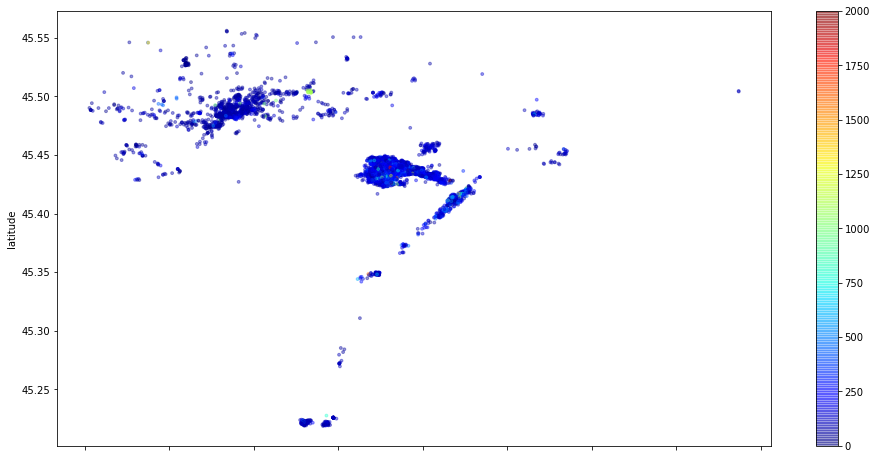

In [184]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"], s=8, cmap=plt.get_cmap('jet'), figsize=(16,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [44]:
# ver a média da coluna `minimum_nights``
media_noite = df["minimum_nights"].mean()
print("A média de mínimo de noites para aluguel é de {} dias".format(media_noite))

A média de mínimo de noites para aluguel é de 2.666374561842764 dias


## Conclusões


Como podemos observar pelas análise de dados do dataframe retirado do Airbnb da cidade de Veneza-Itália, que mesmo sendo uma análise inicial mais básica, podemos responder várias perguntas que podem ser úteis dando para as pessoas interessadas em alugar seus imóveis na região (média de preço, bairros mais caros e baratos, média de noites de locação etc) quanto para pessoas que desejam alugar imóveis.

Outra observação importante é que sempre devemos ter uma análise crítica dos dados obtidos como na resposta da questão 8, em que houve distorções por conta de quantidade de entradas x preços fora da média.